## **Tugas Besar Pengganti Ujian Tengah Semester (UTS), Semester Ganjil 2020/2021**
### Deadline: 10 November 2020, Jam 12.00 (siang)
##### Dosen: FYS, ITQ, HBU

---
***'Dengan ini kami menyatakan bahwa tugas ini dibuat sebenar-benarnya hasil kerjasama kami dalam kelompok. Kami menjunjung tinggi aspek kejujuran sehingga kami dapat pastikan hasil ini bukan berasal dari meniru/mencontek/meminta hasil/berdiskusi dengan kelompok lain, baik dalam satu kelas yang sama maupun berbeda'***

---
Bandung, 8 November 2020

> Kelompok: 3
>
> Anggota:
> 1. Muardy Muhammad Junius, 1102174143
> 2. Mumtazanisa Fairuzen, 1102170138
> 3. Ahdan Abdulfattah Rizqi, 1102183135
> 4. Bayu Krisna Mukti, 1102174049
> 5. Paskal Kurnia Pasoloran, 1102164253
> 6. Gelar Gemilang Zulkarnain, 1102184198


### **Penjelasan (harus dibaca dan dimengerti)**:
* Tugas besar harus dikerjakan menggunakan bahasa pemrograman `Python` dan *library* `Scikit-Learn`. Pengkodean yang dilakukan tiap soal berurut sesuai dengan perintah-perintah pada tiap soal (Lihat **A.2. Dasar-dasar *Applications Programming Interface* (API) dari *Scikit-Learn*** pada **Chapter 3**)
* Pada setiap bagian jawaban, anda bisa menambahkan cell `code` untuk kode maupun cell `Markdown` untuk penjelasan, sesuai dengan kebutuhan masing-masing.
* Dikumpulkan sesuai dengan tenggat waktu, setiap keterlambatan akan diberikan hukuman pengurangan 10 poin setiap kelipatan 15 menit.
* Dikerjakan dengan `Jupyter Lab` atau `Jupyter Notebook`, dan dikumpulkan dalam bentuk file dengan extension `.ipynb` yang digunakan pada `Jupyter Notebook/Jupyter Lab` (tidak boleh dalam format lain)


## 1. Regresi 

<img src="BeratIkan.png" alt="GDP" width="600"/>
<div style="text-align: center">
<center>Gambar 1: Ilustrasi feature-feature untuk estimasi/prediksi berat ikan

Joko ingin melakukan prediksi/estimasi berat atau panjang ikan berdasarkan pengamatan ukuran ikan (panjang/lebar) seperti yang diilustrasikan pada Gambar 1. Joko telah mengumpulkan Dataset ikan yang dijual di pasar dengan spesies ikan yaitu *bream, white fish, perch, roach fish, pike* dan *smelt* dan anda dapat mengaksesnya pada berikut [**Data Ikan 1**](https://drive.google.com/file/d/1atDUbrpW2W9YmB43bk3quZ4_HR_gEi-D/view?usp=sharing). 

Karena Joko belum pernah mengambil matakuliah Machine Learning, Joko bingung menentukan model yang akan digunakan dan ingin meminta bantuan anda sebagai seorang konsultan *Machine Learning*. Anda diminta Joko menemukan model yang tepat untuk mengestimasi berat dan panjang ikan tersebut dengan kinerja yang baik. Setiap kelompok bekerja dengan dataset yang sama tetapi dengan aturan berikut:

1. Kelompok 1, prediksi berat ikan menggunakan parameter a (Length1) dengan Regresi (linier/polinomial)
2. Kelompok 2, prediksi berat ikan menggunakan parameter d (Width) dengan Regresi (linier/polinomial)
3. Kelompok 3, prediksi berat ikan menggunakan parameter e (Height) dengan Regresi (linier/polinomial) pada jenis ikan perch
4. Kelompok 4, prediksi berat ikan menggunakan parameter b (Length2) dengan Regresi (linier/polinomial)
5. Kelompok 5, prediksi panjang ikan(Length3) menggunakan parameter (Weight) dengan Regresi (linier/polinomial)
6. Kelompok 6, prediksi berat ikan menggunakan parameter a(Length1) dengan jenis ikan Perch menggunakan Regresi (linier/polinomial)
7. Kelompok 7, prediksi berat ikan menggunakan ciri b (Length2) dengan jenis ikan bream menggunakan Regresi (linier/polinomial)
8. Kelompok 8, prediksi berat ikan berdasarkan fitur (Height) dengan Regresi (linier/polinomial) pada jenis ikan Roach.

#### **Berikut adalah langkah-langkah solusi yang anda gunakan untuk membantu Joko menemukan model regresi terbaik**

* Copy dataset yang ada pada link di atas ke dalam direktori lokal masing-masing (untuk memudahkan tempatkan pada folder yang sama dengan file Tugas Besar anda).


**A. Load dataset dalam format CSV tersebut dan plot data target vektor sebagai sumbu y dan matriks *feature* x (berdimensi 1) sebagai sumbu x**

Catatan: yang diplot hanya yang diperlukan. Misalkan untuk kelompok 1, berat ikan (Weight) sebagai target vektor (sumbu y) dan panjang ikan (Length1) sebagai matriks *feature* (sumbu x).

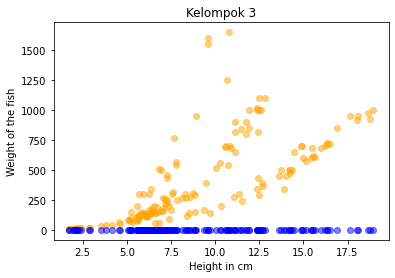

In [306]:
import numpy as np # untuk pengaturan array data
import pandas as pd # untuk mempermudah untuk indexing tabel
import matplotlib.pyplot as plt #untuk plot grafik 
from sklearn.linear_model import LinearRegression #library untuk liniear regresi 
from sklearn.metrics import mean_squared_error, r2_score #library untuk menghitung score accuracy 
from sklearn.model_selection import train_test_split #library untuk menerapkan train test split pada saat pembagian variabel train dan test
from sklearn.preprocessing import PolynomialFeatures #library untuk polynomial regresi

data = pd.read_csv('./Fish.csv') #mengambil data
df = data.copy() #mengcopy data 





plt.scatter(df['Height'],df['Weight'], color='orange', alpha=0.5)  #memplot sumbu x height dan sumbu y weight
plt.scatter(df['Height'], df['Species']=='Perch', color='blue', alpha=0.5) #memplot sumbu x height dan sumbu y spesies perch

#memberi label
plt.xlabel('Height in cm')  
plt.ylabel('Weight of the fish')
plt.title('Kelompok 3');   

**B. Atur data ke dalam matriks feature X dan target vektor y dimana data sesuai dengan kelompok masing-masing**

Catatan: Pengaturan ini dilakukan supaya bisa digunakan pada soal C (sesuai format data `Scikit Learn`)

In [307]:
#menentukan matrik fitur X dan target y untuk linear
y = df['Weight'] 
X = df.iloc[:,2:7]
#menentukan matrik fitur X dan target y untuk polinomial
X_p = df.iloc[:, 5].values.reshape(-1,1)
y_p = df.iloc[:, 1].values.reshape(-1,1) 

**C. Memilih Model Class, dan Penentuan Hyperparameter (jika ada)**

Catatan: 
- Dengan melihat plotting data pada poin A, maka pastikan berapa orde polinomial yang ingin anda gunakan (belum tentu garis lurus). Lihat lecture note **Chapter 2**.
- Jika memungkinkan pilihlah orde polinomial dengan metode pemilihan model terbaik seperti pada lecture note **Chapter 3**, bagian **4. Memilih Model Terbaik**.

In [308]:
#menentukan train test split untuk linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#membuat train test split dengan distribus 20% ke variable test dan 80% ke variable train
reg = LinearRegression()
#menentukan train test split untuk polinomial
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_p, y_p, test_size=0.2) #membuat train test split dengan distribus 20% ke variable test dan 80% ke variable train
poly_reg = PolynomialFeatures(degree = 15)  
X_poly = poly_reg.fit_transform(X_trainp)

**D. Melakukan *fitting* model terhadap data (training)**

Catatan: Setelah memilih model class, gunakan model tersebut untuk melakukan training dengan data dari poin B.


In [309]:
#menentukan fitting untuk linear
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#menentukan fitting untuk polinomial
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_trainp) 
y_predp=lin_reg_2.predict(poly_reg.fit_transform(X_testp)) #meprediksi data polynomial pada variabel x test

**E. Memprediksi data baru**

Catatan: Buat data baru (harga-harga feature) dengan range dari harga minimum ke harga maksimum feature yang anda gunakan pada data poin B (matriks feature X), misalkan dengan `linspace()` dari `Numpy`. Kemudian prediksi harga-harga target (y) berdasarkan harga feature tersebut. Selanjutnya anda ploting data training dengan data hasil prediksi pada langkah ini. (lihat **Chapter 3**)

    Estimated Weight
0         796.264004
1                NaN
2         713.650412
3         908.385332
4         136.648889
5         303.944689
6         686.312986
7         666.855152
8                NaN
9         640.902470
10        391.172861
11       1095.683766
12        167.983659
13        370.081463
14        509.052369
15        701.918370
16        915.423142
17        602.592570
18        640.700408
19        876.304405
20        371.589401
21        862.822364
22        294.713342
23        467.242205
24        241.597600
25         31.544811
26        605.910211
27        702.712445
28        533.165870
29        362.733865
30        882.263552
31               NaN


     Height
0   11.7300
1    2.2139
2   11.4884
3       NaN
4    6.1677
5    8.1454
6   11.7612
7       NaN
8    2.9322
9       NaN
10   7.8204
11   9.6000
12   6.3840
13  12.4800
14      NaN
15  10.8350
16  12.6040
17      NaN
18      NaN
19  11.9328
20   7.2828
21      NaN
22   6.5610
23      NaN
24   

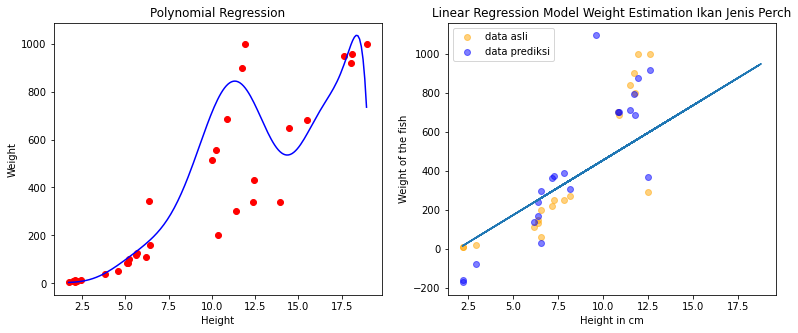

In [310]:
df.Height[df.Species=='Perch'].sort_values(ascending=True) #mengurutkan Height pada spesies perch
df.Weight[df.Species=='Perch'].sort_values(ascending=True) #mengurutkan weight pada spesies perch

y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight']) #menampilkan data Weight yang diprediksi
y_pred1 = y_pred1.reset_index(drop=True) #menampilkan tabel
#membataskan minimal dan maksimal Weight ikan jenis Perch
filter1 = y_pred1>=5.9 
filter2 = y_pred1<=1100
ab1 = y_pred1.where(filter1 & filter2) #menerapkan pembatasan minimal dan maksimal
ab1.fillna(0)   #mengokosongkan data yang berinilai NAN (not a number)
print(ab1) #menampilkan hasil
print("\n")

X_test1 = pd.DataFrame(X_test['Height']) #menampilkan height 
X_test1 = X_test1.reset_index(drop=True)#menamplikan tabel
#membataskan minimal dan maksimal Height ikan jenis Perch
filter1 = X_test1>=2.112 
filter2 = X_test1<=12.8002
ab = X_test1.where(filter1 & filter2)  #menerapkan pembatasan minimal dan maksimal
ab.fillna(0) #mengokosongkan data yang berinilai NAN (not a number)
print(ab) #menampilkan hasil
print("\n")
                              
y_test1 = pd.DataFrame(y_test) #menampilkan Weight 
y_test1 = y_test1.reset_index(drop=True)#menampilkan tabel
#membataskan minimal dan maksimal Weight ikan jenis Perch                             
filter1 = y_test1>=5.9
filter2 = y_test1<=1100
ab3 = y_test1.where(filter1 & filter2) #menerapkan pembatasan minimal dan maksimal
ab3.fillna(0)#mengokosongkan data yang berinilai NAN (not a number)
print(ab3) #menampilkan hasil
print("\n")

ynew = pd.concat([ab, ab1,ab3], axis=1) #menggabungkan tabel prediksi Weight, tabel Height dan tabel Weigth 
ynew.fillna(0) #mengkosongkan data yang bernilai NAN (not a number)
print(ynew) #menampilkan hasil
print("\n")
                              
#membataskan minimal dan maksimal Weight ikan jenis Perch 
filter1 = X_test['Height']>=2.112 
filter2 = X_test['Height']<=12.8002
test = X_test['Height'].where(filter1 & filter2)#menerapkan pembatasan minimal dan maksimal 
test2 = test.fillna(0)#mengkosongkan data yang bernilai NAN (not a number)
#membataskan minimal dan maksimal Weight ikan jenis Perch 
filter3 = y_test>=5.9
filter4 = y_test<=1100
test4 = y_test.where(filter3 & filter4)#menerapkan pembatasan minimal dan maksimal 
test5 = test4.fillna(0)#mengkosongkan data yang bernilai NAN (not a number) 
plt.figure(figsize=(20, 5)) #memberi batas panjang dan lebar tabel plot
plt.subplot(132) #sebagai id untuk tabel plot
#untuk plot data prediksi Weigth berdasarkan Height pada ikan jenis perch
plt.scatter(test, test4, color='orange', alpha=0.5, label = 'data asli')
plt.scatter(test, y_pred, color='blue', alpha=0.5, label= 'data prediksi')
plt.legend(loc='upper left')
#memberi label pada sumbu x dan y
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model Weight Estimation Ikan Jenis Perch');
x = np.array(X_test['Height'])
y = np.array(y_pred)
#membuat gradien pada linier regresien
m, b = np.polyfit(x, y, 1)  
plt.plot(x, m*x + b)#bagian e
print("\n")
y_pred = reg.predict(X_test)
#menampilkan accuracy pada regresi liner
print("accuracy regresi linier:",r2_score(y_test, y_pred))
print("\n")
#menampilan accuracy pada regresi polinomial
y_predp=lin_reg_2.predict(poly_reg.fit_transform(X_testp))
print("accuracy regresi polynomial:",r2_score(y_testp, y_predp))

def poly():
    #membuat garis pada polinomial
    X_grid = np.arange(min(X_testp), max(X_testp), 0.1)
    X_grid = X_grid.reshape((len(X_grid)), 1)
    #id untuk tabel polinomial
    plt.subplot(131)
    plt.scatter(X_testp, y_testp, color = 'red') #menampilkan plot Height pada sumbu x dan plot Weight pada sumbu y
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue') #menampilkan garis polinomial
    plt.title('Polynomial Regression')#judul tabel plot
    #memberi label pada sumbu x dan y
    plt.xlabel('Height') 
    plt.ylabel('Weight')
    plt.show()

poly()

**Kesimpulan**. Berikan kesimpulan model apa yang akan anda rekomendasikan kepada Joko setelah anda mengikuti langkah A-E (sesuai dengan kelompok masing-masing).

model yang akan kami rekomendasikan pada Joko untuk melakukan prediksi panjang ikan (dengan height) yaitu model model regresi liniear, karena pada kasus ini model regesi linear memiliki akurasi yang lebih tinggi dari pada polynomial.

## 2. Klasifikasi dengan Regresi Logistik dan Stochastic Gradient Descent (SGD) 

Berlanjut dengan cerita Joko. Selain ingin memprediksi berat atau panjang ikan, Joko juga tertarik untuk melakukan klasifikasi apakah ikan tertentu termasuk ikan Gurame atau Ikan Mujair. Kemudian dia memutuskan, klasifikasi adalah berdasarkan *feature* berat dan juga panjang. Hasil pengumpulan data Joko dapat dilihat pada link berikut ini: [**Data Ikan 2**](https://drive.google.com/file/d/1DBlEemGWKSaLb4X6W7PLDpccWCFF3VnD/view?usp=sharing). 

Pada data tersebut, kolom pertama menyatakan berat ikan (dalam gram), kolom kedua menyatakan panjang ikan (dalam cm) dan kolom ketiga menyatakan jenis ikan, dimana ikan Gurame dikodekan dengan angka 1, sedangkan ikan Mujair dikodekan dengan angka 0. Karena Joko sudah sedikit paham menyangkut *Machine Learning*, dia meminta anda untuk menggunakan Metode Regresi Logistik dan SGD dalam melakukan klasifikasi, untuk kemudian membandingkannya.

#### **2.1. Berikut adalah langkah-langkah solusi Regresi Logistik yang anda gunakan untuk membantu Joko melakukan klasifikasi jenis ikan Gurame atau Ikan Mujair**

* Copy dataset yang ada pada link di atas ke dalam direktori lokal masing-masing (untuk memudahkan tempatkan pada folder yang sama dengan file Tugas Besar anda).
* Setiap kelompok menggunakan dataset yang sama


**A. Load dataset dalam format CSV tersebut** 

* Anda bisa menggunakan package `Pandas` maupun `Numpy`.

In [311]:
import pandas as pd #untuk indexing pada tabel csv
from sklearn.model_selection import train_test_split #untuk library train test split pada saat pembagian variabel train dan test
from sklearn.linear_model import LogisticRegression #untuk library logistik regresi
from sklearn import metrics #untuk confusion matrics
import matplotlib.pyplot as plt #untuk plot data 
from sklearn.metrics import mean_squared_error, r2_score #untuk menghitung akurasi 
import numpy as np #untuk pengaturan array data
%matplotlib inline 

df = pd.read_csv("IkanIndo01.csv") #membaca file csv 
df.columns = ['berat', 'panjang', 'jenis'] #mendefiniskan baris pada file csv
df.head() #menampilan 5 data pertama


,berat,panjang,jenis
0,290.0,31.2,1
1,340.0,31.1,1
2,363.0,33.5,1
3,430.0,34.0,1
4,450.0,34.7,1


**B. Atur data ke dalam matriks feature X dan target vektor y, kemudian plot data dalam dua dimensi**

Catatan: sumbu x --> Feature 1 (berat ikan), sumbu y --> Feature 2 (panjang ikan), untuk *class* ikan Gurame (1) gunakan *square* warna biru (`'bs'`) dan untuk *class* ikan Mujair (0) gunakan *circle* warna hijau (`'ho'`). Sebagai contoh anda bisa lihat di **Chapter 2**.   

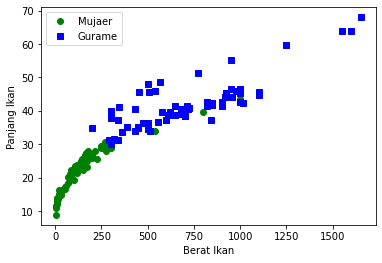

In [312]:
plt.plot(df.berat[df.jenis ==0],df.panjang[df.jenis ==0],'go',color='green',label='Mujaer') #menampilkan ikan jenis mujaer pada sumbu x berat dan sumbu y panjang 
plt.plot(df.berat[df.jenis ==1],df.panjang[df.jenis ==1],'bs',color='blue', label='Gurame')#menampilkan ikan jenis gurame pada sumbu x berat dan sumbu y panjang
plt.legend(loc='upper left'); #memberikan penjelasan pada tabel plot dibagian kiri atas
#memberi label pada sumbu x dan y
plt.xlabel('Berat Ikan')
plt.ylabel('Panjang Ikan')
plt.show() #menampilkan data plot

**C. Memilih Model Class, dan Penentuan Hyperparameter (jika ada)**

Catatan: 
- Gunakan model Regresi Logistik 

In [313]:
#menentukan matriks X dan fitur y
X = df[['berat', 'panjang']]
y = df['jenis'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)#membuat train test split dengan distribus 20% ke variable test dan 80% ke variable train
logistic_regression= LogisticRegression() #menggunakan logistik regresion
#hyperparameter (c)



**D. Melakukan *fitting* model terhadap data (training)**

Catatan: Setelah memilih model class, gunakan model tersebut untuk melakukan training dengan data dari poin B.

In [314]:
#melakukan fitting model
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test) #melakukan prediski data pada variabel test




**E. Memprediksi data baru**

Jika terdapat dua ekor ikan, dimana ikan 1 dengan berat = 200 gram dan panjang = 30 cm, sedangkan ikan 2 berat = 600 gram dan panjang = 40 cm. Tentukan jenis kedua ikan tersebut apakah ikan Gurame atau Mujaer berdasarkan model anda.

In [315]:
test = logistic_regression.predict([[200,30.0]])#mendefenisikan data yang akan di prediksi pada sumbu x dan y 

#memberikan kondisi pada saat penentuan jenis ikan
if test == 0 :
    print("mujair")

else: 
    print("Gurame") 
    

test = logistic_regression.predict([[600,40.0]])#mendefenisikan data yang akan di prediksi pada sumbu x dan y 
#memberikan kondisi pada saat penentuan jenis ikan
if test == 0 :
    print("mujair")

else: 
    print("Gurame")
    


mujair
Gurame


**F. Plotting Batas Keputusan (*Decision Boundary*)**

Gambar data seperti pada poin B, tetapi tambahkan batas keputusan (berupa garis lurus) yang memisahkan antara data ikan Gurame dan ikan Mujair (lihat **Chapter 2**, bagian **2.3.Contoh Python untuk Regresi Logistik**)

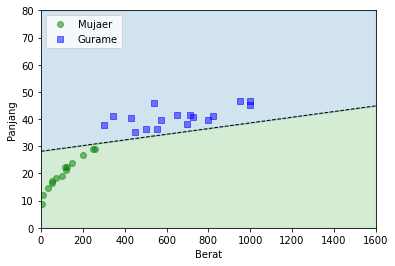

In [316]:
b = logistic_regression.intercept_[0] #variabel b sebagai intersep
w1, w2 = logistic_regression.coef_.T
#menghitung decision boundary
c = -b/w2 
m = -w1/w2
#menentukan xmin xmax ymin ymax pada tabel plot
xmin, xmax = 0, 1600
ymin, ymax = 0, 80
xd = np.array([xmin, xmax])
yd = m*xd + c #membuat rumus untuk boundaries
plt.plot(xd, yd, 'k', lw=1, ls='--') #menampilkan batas
plt.fill_between(xd, yd, ymin, color='tab:green', alpha=0.2)#memberi warna hijau pada bagian bawah tabel plot
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)#memberi warna biru pada bagian atas tabel plot

plt.plot(X_test['berat'][y_pred==0],X_test['panjang'][y_pred==0], 'go',c='g', alpha=0.5,label='Mujaer')#menampilkan berat dan panjang ikan mujaer yang sudah diprekdisi 
plt.plot(X_test['berat'][y_pred==1],X_test['panjang'][y_pred==1], 'bs',c='b', alpha=0.5,label='Gurame')#menampilkan berat dan panjang ikan gurame yang sudah diprekdisi 
#menentukan batas minimum dan maximum pada sumbu x dan y 
plt.xlim(xmin, xmax) 
plt.ylim(ymin, ymax)
#memberikan label 
plt.ylabel('Panjang')
plt.xlabel('Berat')
plt.legend(loc='upper left');#memberikan keterangan pada pojok kiri atas tabel plot
plt.show() #menampilkan data hasil plot






**G. *Cross Validation* dengan 5-Fold**

Gunakan metode *cross validation* dengan 5-fold (`cv=5`), dan kemudian tentukan *cross validation score-nya*

In [317]:
from sklearn.model_selection import cross_val_score #library cross validation 
scores = cross_val_score(logistic_regression, X_train, y_train, cv=5) #menentukan cross validation dengan nilai 5
print('Cross-Validation Accuracy Scores', scores) #menampilkan hasil cross validation
#menampilkan data minimum, rata-rata dan maximum 
scores = pd.Series(scores) 
scores.min(), scores.mean(), scores.max()  





Cross-Validation Accuracy Scores [0.96 0.92 0.96 0.84 1.  ]


(0.84, 0.9359999999999999, 1.0)

Apa kesimpulan anda dengan hasil tersebut?

(nilai akurasi cross validation) telah tervalidasi dataset yang telah dibagi menjadi himpunan data latih dan validasi. Himpunan data merupakan jumlah iterasi. Dan berdasarkan 5 fold yaitu memisahkan data ke dalam 5 grup, dan menggunakannya masing-masing secara bergantian untuk evaluasi model yang ditraining dengan 4/5 data yang lain, maka akan ada 4 lipatan. 

**H. Tentukan *Confusion Matrix*, *Precision* dan *Recall***

In [318]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score #untuk library confusion matrik, recall dan precision
cm = metrics.confusion_matrix(y_test, y_pred) #variabel confusion matriks
prc = precision_score(y_test,y_pred, average="micro") #untuk variabel precision
rcc = recall_score(y_test, y_pred, average="micro")#untuk variabel recall
print("confusion matrix : \n",cm) #menampilkan confusion matrix
print("Recall score: ",rcc) #menampilkan recall matrix
print("Precision score: ",prc) #menampilkan precision




confusion matrix : 
 [[14  1]
 [ 0 17]]
Recall score:  0.96875
Precision score:  0.96875


Apa kesimpulan anda dengan hasil tersebut?

Confusion matrix, matrix yang mempresentasikan prediksi data yang dihasilkan yang membagi true positive, false positive, true negative, false negative (harus ada dulu sebelum mencari recall dan precision)

Recall. menunjukkan false negatif (FN) rendah 

Precision, menunjukkan kelas false positive (FP) rendah 

accuracy, (14+17)/(14+17+1+0) = 0.968... mendekati 1, metode ini baik digunakan


-> Dengan hasil nilai precision dan recall yang sama maka kondisi ini disebut juga dengan, Kondisi ideal efektivitas sistem temu kembali informasi. dan melihat nilai nya di atas 50% untuk keduanya, maka metode ini baik digunakan.


#### **2.2. Berikut adalah langkah-langkah solusi *Stochastic Gradient Descent Classifier* yang anda gunakan untuk membantu Joko melakukan klasifikasi jenis ikan Gurame atau Ikan Mujair**

Catatan:
* Gunakan `SGDClassifier` dari model `linear` pada `Scikit-Learn`.
* Ikuti langkah langkah seperti pada soal 2.1 dari C s/d H, kecuali nomor F tidak perlu dikerjakan.
* Anda bisa menggunakan *scaling* jika dibutuhkan (lihat contoh pada **Chapter 3**, bagian **7. Multiclass Classifier**)

Setelah selesai, maka bandingkan hasil *confussion matrix*, *precission* dan *recall* dari metode regresi logistik dan SGD. 

-> pada SGD, menggunakan satu training sample yang diambil secara acak dari training set tiap gradien.

-> regresi logistik, model prediksi untuk klasifikasi

--> nilai akurasi yang dimiliki untuk setiap confusion matrix, precision dan recall memiliki nilai yang sama yaitu, 0.968... yaitu 96%.

mujair
Gurame
Cross-Validation Accuracy Scores [0.96 0.92 0.96 0.88 1.  ]
confusion matrix : 
 [[14  1]
 [ 0 17]]
Recall score:  0.96875
Precision score:  0.96875


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.94')

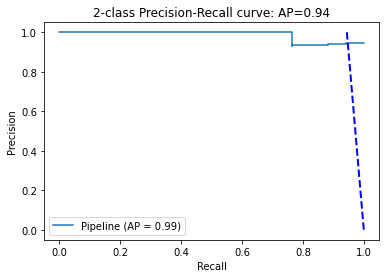

In [322]:
import numpy as np #untuk indexing array data
from sklearn.linear_model import SGDClassifier #untuk klasifikasi sgd
from sklearn.preprocessing import StandardScaler #untuk bagian dari parameter pipeline
from sklearn.pipeline import make_pipeline #untuk mentraining model sgd
from sklearn.metrics import precision_recall_curve #untuk menentukan precall
from sklearn.metrics import plot_precision_recall_curve #untuk menentukan grafik recall dan precision
from sklearn.metrics import average_precision_score #menentukan averaging precision score

#menentukan Fitur X dan target y
X = df[['berat', 'panjang']] 
y = df['jenis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)#membuat train test split dengan distribus 20% ke variable test dan 80% ke variable train
#melakukan training dengan sgdclassifier 
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)#melakukan fitting model
y_pred=clf.predict(X_test)#melakukan predict pada variabel x_test
y_pred

#melakukan prediksi pada data yang diberikan
test = clf.predict([[200,30.0]]) 
if test == 0 :
    print("mujair")

elif( test== 1): 
    print("Gurame")
    
test = clf.predict([[600,40.0]])
if test == 0 :
    print("mujair")

elif(test == 1): 
    print("Gurame")
#menentukan cross validation dengan nilai 5 
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores) #menampilkan hasil cross validation 
#menampilkan data minimum, rata-rata dan maximum 
scores = pd.Series(scores) 
scores.min(), scores.mean(), scores.max()

cm = metrics.confusion_matrix(y_test, y_pred)#sebagai variabel confusion matrics
prc = precision_score(y_test,y_pred, average="micro")#sebagai variabel precision 
rcc = recall_score(y_test, y_pred, average="micro") #sebagai recall variabel 
print("confusion matrix : \n",cm)#menampilan consufion matriks 
print("Recall score: ",rcc) #menampilkan recall
print("Precision score: ",prc)#menampilkan precision 

#menampilkan grafik precision dan recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.plot(precision,recall,"b--",linewidth=2)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


## 3. Klasifikasi dengan Decision Tree dan Ensamble Learning

Anda sebagai seorang pegawai baru di sebuah perusahaan yang bergerak di bidang *Data Mining* diberikan tugas untuk melakukan klasifikasi bahwa seseorang terkena Kanker (*cancer*) jinak (*benign*) atau ganas (*malignant*) berdasarkan data set di alamat berikut: [**Data Kanker**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). 

Berdasarkan dataset tersebut untuk mengklasifikasikan jenis kanker ganas atau jinak, didasarkan pada ukuran tumor, dengan *feature* sebanyak 30. Tetapi, anda hanya diberikan tugas untuk menggunakan 3 *feature* saja, dengan aturan sebagai berikut berdasarkan kelompok:

1. Kelompok 1 : gunakan feature 'mean radius', 'mean texture', 'mean perimeter'
2. Kelompok 2 : gunakan feature 'mean texture', 'mean perimeter', 'mean area',
3. Kelompok 3 : gunakan feature 'mean perimeter', 'mean area', 'mean smoothness'
4. Kelompok 4 : gunakan feature 'mean smoothness', 'mean compactness', 'mean concavity',
5. Kelompok 5 : gunakan feature 'mean area', 'mean smoothness', 'mean compactness'
6. Kelompok 6 : gunakan feature 'mean smoothness', 'mean compactness','mean concave points'
7. Kelompok 7 : gunakan feature 'mean compactness','mean concave points', 'mean symmetry'
8. Kelompok 8 : gunakan feature 'mean concave points', 'mean symmetry', 'mean fractal dimension'

indeks kolom dari setiap *feature* di atas bisa dilihat di link berikut: [nomor kolom](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset), yaitu sesuai urutan berikut: radius, texture, perimeter,..., dst.
Contoh: indeks kolom 0 untuk 'mean radius', 1 untuk 'mean texture',..., dst

*Class* atau target yang digunakan:
Target 
* WDBC-Malignant (ganas) sebanyak 212 data
* WDBC-Benign (jinak) sebanyak 357 data

Oleh atasan, anda diharuskan dapat menjawab pertanyaan-pertanyaan berikut dengan bukti program yang telah anda buat:

1. Dengan *class* `DecisionTreeClassifier` menggunakan *4-fold cross validation*, maka bandingakan *validation score* antara `DecisionTreeClassifier` memakai *gini impurity* dan *entropy impurity*!
2. Bandingkan *accuracy score* untuk `DecisionTreeClassifier` **tanpa dan dengan *pasting*** (estimator = 100, max_samples = 100)!
3. Perlihatkan *confusion matrix* dari hasil *ensemble learning classification* dari regresi logistik, svm dan *decision tree*, dan hitunglah nilai *precision* dan *recall* masing-masing!

Catatan: 
* Anda dapat mengikuti langkah-langkah seperti pada nomor 1 atau 2 sebelumnya untuk membuat program, atau anda bisa buat sekaligus dalam satu cell.
* Referensi yang digunakan adalah ***Chapter 4***.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean perimeter' 'mean area' 'mean smoothness']
Max Depth: 5
Training Accuracy: 0.94
Testing Accuracy: 0.89

0    0.822430
1    0.906542
2    0.830189
3    0.877358
dtype: float64
Max Depth: 5
Training Accuracy: 0.94
Testing Accuracy: 0.89


CV menggunakan gini impurity:
 0    0.841121
1    0.906542
2    0.839623
3    0.877358
dtype: float64


Max Depth: 5
Training Accuracy: 0.94
Testing Accuracy: 0.90
CV menggunakan entropy impurity:
 0    0.822430
1    0.887850
2    0.839623
3    0.877358
dtype: float64


  DecisionTreeClassifier Training Accuracy dengan pasting: 0.93
  DecisionTreeClassifier Testing Accuracy dengan pasting: 0.90


  DecisionTreeClassifier Training Accuracy tanpa pasting: 0.94
  DecisionTreeClassifier Testing Accuracy tanpa pasting: 0.89


confusion matrix DecisionTreeClassifier  : 
 [[45  8]
 [ 7 83]]
Recall score DecisionTreeClassifier:  0.8951048951048951
Precision score 

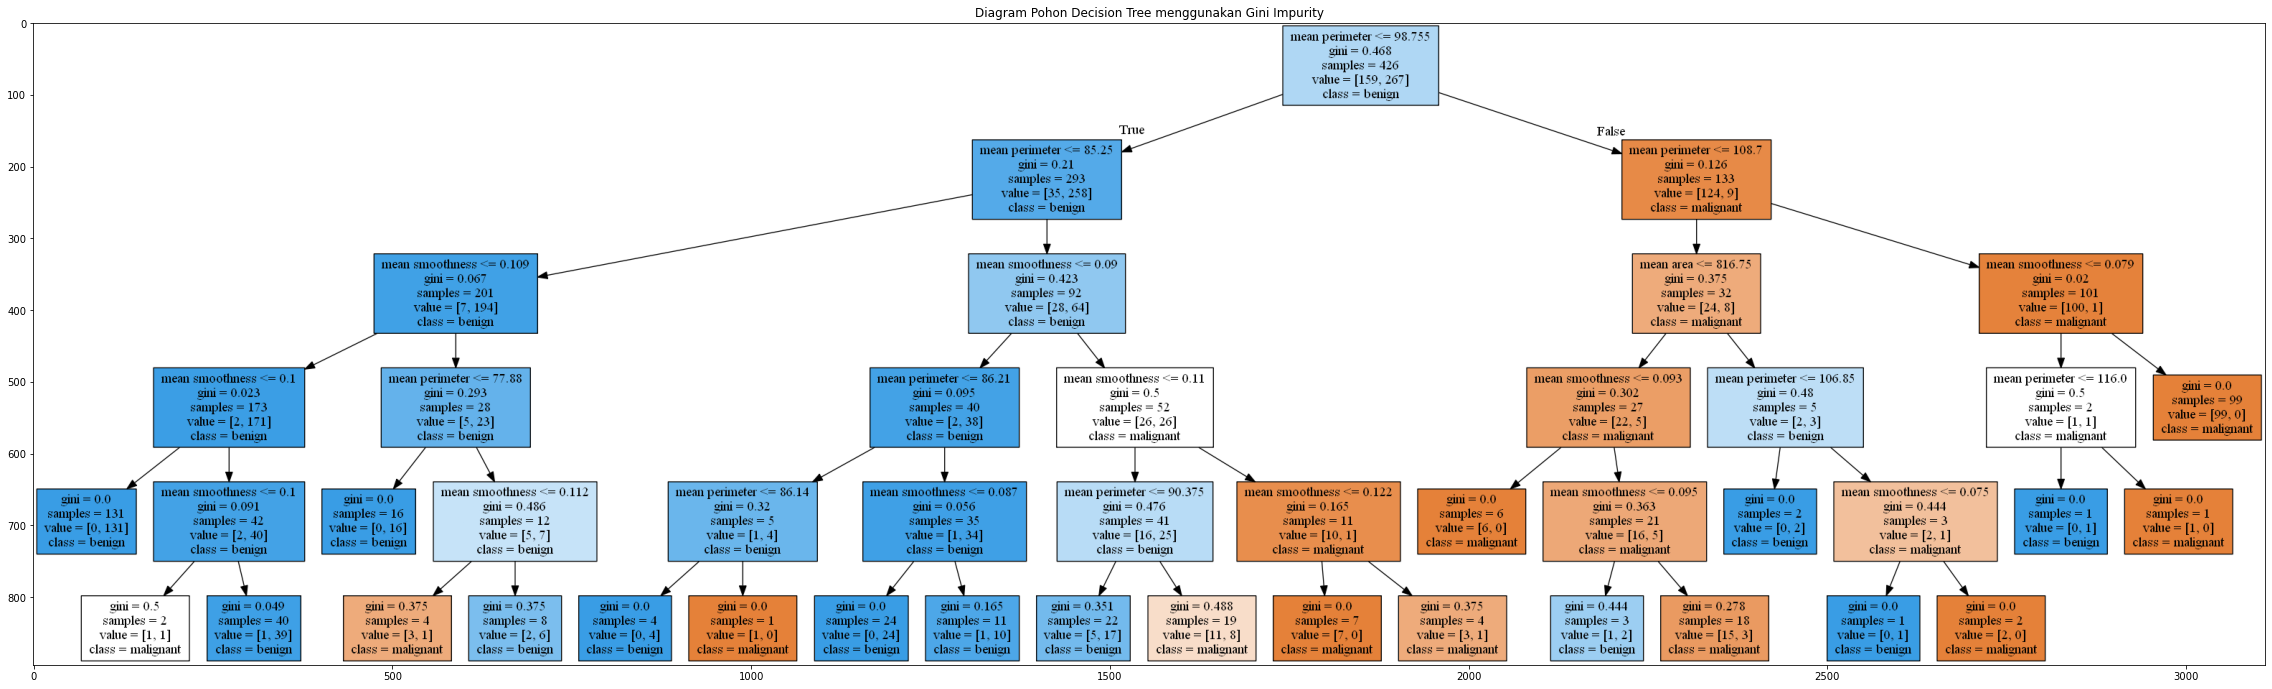

In [320]:
import graphviz #untuk mengenerate grafik pohon
from sklearn.tree import (
    DecisionTreeClassifier, #untuk decision tree clasifier
    export_graphviz, #Untuk export data hasil grafik pohon 
    )
from sklearn.model_selection import train_test_split #untuk train test split pada saat training data 
from sklearn.datasets import load_breast_cancer #untuk meload dataset breast cancer
import numpy as np #untuk indexing array data
import pandas as pd #untuk indexing tabel csv 
import matplotlib.pylab as plt #untuk plot data
from sklearn.model_selection import cross_val_score #untuk cross validation 
from sklearn.ensemble import BaggingClassifier #untuk bagging classifier (pasting dan tanpa apsting)
from sklearn.metrics import confusion_matrix,precision_score,recall_score #untuk confusion matriks, preicion dan recall
import sklearn.metrics as metrics #untuk confusion matrics
from sklearn.ensemble import RandomForestClassifier #untuk random forest classifer
from sklearn.linear_model import LogisticRegression #untuk logistik linear
from sklearn.svm import SVC #untuk svm classifier
#untuk menampilkan data berupa gambar
from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline

#meload data cancer
cancer = load_breast_cancer()
print(cancer.keys()) #menampilkan deskripsi data cancer

print(cancer.feature_names[2:5]) #menampilkan data mean perimeter’, ‘mean area’, ‘mean smoothness
#melihat isi dari fitur mean perimeter’, ‘mean area’, ‘mean smoothness
a =cancer.data[:,2:5] 
a.shape

cancer.target.shape
#menentukan matrix fitur pada variabel X dan target Y
X = cancer.data[:,2:5] 
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y) #menggunkan train test split

#melakukan process training dengan decision tree classifier dengan criterion gini 
tree = DecisionTreeClassifier(criterion='gini',max_depth=5)
tree.fit(X_train, y_train) #melakukan fitting data
export_graphviz(tree, out_file="tree.dot", class_names=cancer.target_names, #melakukan export graphviz dengan extension .dot
                feature_names=cancer.feature_names[2:5], impurity=True,
                filled=True)

#membuat fungsi training klasifikasi decision tree untuk melihat kecocokan maxdepth mana yang baik untuk kasus ini 
def build_tree(max_depth=5):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    print("Max Depth: {0}".format(max_depth))
    print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
    print("Testing Accuracy: {0:.2f}".format(tree.score(X_test, y_test)))
    print()
    return

build_tree()

#membaca file extension .dot
with open("tree.dot") as reader:
    dot_file = reader.read()

graphviz.Source(dot_file, format="png").render("diagrampohon")#mengexport file dengan extension .png dengan nama diagrampohon ke direktori


scores = cross_val_score(tree, X_train, y_train, cv=4) #melakukan cross validation dengan nilai 4
#menentukan nilai minimum, nilai rata-rata dan maximal 
scores = pd.Series(scores) 
print(scores)
scores.min(), scores.mean(), scores.max()

tree1 = DecisionTreeClassifier(criterion='gini',max_depth=5)#menentukan decesion tree dengan criteration gini 
tree1.fit(X_train, y_train)#melakukan fitting data
#menampilkan max dep, training accuracy, dan testing accuracy
print("Max Depth: {0}".format(5)) 
print("Training Accuracy: {0:.2f}".format(tree1.score(X_train, y_train)))
print("Testing Accuracy: {0:.2f}".format(tree1.score(X_test, y_test)))
print("\n")
#menampilkan cv dengan gini impurity dengan nilai 4
scores = cross_val_score(tree1, X_train, y_train, cv=4)
scores = pd.Series(scores)
print("CV menggunakan gini impurity:\n",scores)
scores.min(), scores.mean(), scores.max()
print("\n")

tree2 = DecisionTreeClassifier(criterion='entropy',max_depth=5)#melakukan klasifikasi dengan criterion entropy
tree2.fit(X_train, y_train)#melakukan fitting data
#menampilkan max depth, training dan testing accuracy
print("Max Depth: {0}".format(5))
print("Training Accuracy: {0:.2f}".format(tree2.score(X_train, y_train)))
print("Testing Accuracy: {0:.2f}".format(tree2.score(X_test, y_test)))
#menampilkan cv dengan gini impurity dengan nilai 4
scores = cross_val_score(tree1, X_train, y_train, cv=4)
scores = pd.Series(scores)
print("CV menggunakan entropy impurity:\n",scores)
scores.min(), scores.mean(), scores.max()
print("\n")

#melakukan klasifikasi decision tree dengan pasting
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
bag = BaggingClassifier(tree,bootstrap=False, n_estimators=100, max_samples=100,random_state=1)

bag.fit(X_train, y_train)#melakukan fitting data 
#Menampilkan data
print("  DecisionTreeClassifier Training Accuracy dengan pasting: {0:.2f}".format(bag.score(X_train, y_train)))
print("  DecisionTreeClassifier Testing Accuracy dengan pasting: {0:.2f}".format(bag.score(X_test, y_test)))
print("\n")
 
#melakukan klasifikasi decision tree tanpa pasting    
treetp = DecisionTreeClassifier(max_depth=5)
treetp.fit(X_train, y_train)
bagtp = BaggingClassifier(treetp,bootstrap=True, n_estimators=100, max_samples=100,random_state=1)

bagtp.fit(X_train, y_train)#melakukan fitting data 
#Menampilkan data    
print("  DecisionTreeClassifier Training Accuracy tanpa pasting: {0:.2f}".format(treetp.score(X_train, y_train)))
print("  DecisionTreeClassifier Testing Accuracy tanpa pasting: {0:.2f}".format(treetp.score(X_test, y_test)))
print("\n")
#menampilan consfusion matrix, recall dan precision
y_pred=tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
prc = precision_score(y_test,y_pred, average="micro")
rcc = recall_score(y_test, y_pred, average="micro")
print("confusion matrix DecisionTreeClassifier  : \n",cm)
print("Recall score DecisionTreeClassifier: ",rcc)
print("Precision score DecisionTreeClassifier: ",prc)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #membuat train test split dengan distribus 25% ke variable test dan 75% ke variable train
#melakukan klasifikasi random forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)#melakukan fitting data 

#menampilan consfusion matrix, recall dan precision
y_pred=forest.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
prc = precision_score(y_test,y_pred, average="micro")
rcc = recall_score(y_test, y_pred, average="micro")
print("confusion matrix ensemble learning classification: \n",cm)
print("Recall score ensemble learning classification: ",rcc)
print("Precision score ensemble learning classification: ",prc)
print("\n")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)#membuat train test split dengan distribus 20% ke variable test dan 80% ke variable train
#melakukan klasifikasi logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)#melakukan fitting data 

#menampilan consfusion matrix, recall dan precision
y_pred=log_reg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
prc = precision_score(y_test,y_pred, average="micro")
rcc = recall_score(y_test, y_pred, average="micro")
print("confusion matrix LogisticRegression: \n",cm)
print("Recall score LogisticRegression: ",rcc)
print("Precision score LogisticRegression: ",prc)
print("\n")

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) #membuat train test split dengan distribus 25% ke variable test dan 75% ke variable train
#melakukan klasifikasi svm
svm= SVC()
svm.fit(X_train, y_train)#melakukan fitting data

#menampilan consfusion matrix, recall dan precision
y_pred=svm.predict(X_test) 
cm = metrics.confusion_matrix(y_test, y_pred)
prc = precision_score(y_test,y_pred, average="micro")
rcc = recall_score(y_test, y_pred, average="micro")
print("confusion matrix svm : \n",cm)
print("Recall score svm: ",rcc)
print("Precision score svm: ",prc)
print("\n")

#menampilan consfusion matrix, recall dan precision decision tree 
y_pred=tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
prc = precision_score(y_test,y_pred, average="micro")
rcc = recall_score(y_test, y_pred, average="micro")
print("confusion matrix DecisionTreeClassifier  : \n",cm)
print("Recall score DecisionTreeClassifier: ",rcc)
print("Precision score DecisionTreeClassifier: ",prc)

#memplot gambar diagram tree hasil training decison tree menggunakan gini impurity
plt.figure(figsize=(40, 20))
plt.title('Diagram Pohon Decision Tree menggunakan Gini Impurity')
img = mpimg.imread('./diagrampohon.png')
imgplot = plt.imshow(img)
plt.show()